In [172]:
!pip install xgboost
!pip install scikit-plot


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [173]:
import pandas as pd
import numpy as np

import xgboost as xgb
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score

In [174]:
import pandas as pd
import matplotlib
import numpy as np

# Modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adadelta, Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall

from tensorflow.keras.utils import plot_model


# visualização e gráficos
import plotly.express as px
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns
import scikitplot as skplt


# Avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix

In [175]:
df_train = pd.read_csv("dataset_tratado/train_df.csv")
df_val = pd.read_csv("dataset_tratado/validation_df.csv")
df_test = pd.read_csv("dataset_tratado/test_df.csv")

In [176]:
X_train = df_train.drop('satisfied', axis=1)
y_train = df_train['satisfied'].astype(int)

X_val = df_val.drop('satisfied', axis=1)
y_val = df_val['satisfied'].astype(int)

X_test = df_test.drop('satisfied', axis=1)
y_test = df_test['satisfied'].astype(int)

In [177]:
X_train

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Class_Eco,Class_Eco Plus,Departure Delay Category_10 minutos até 30 minutos,Departure Delay Category_30 min até 1 hora,Departure Delay Category_Mais de 1 hora,Departure Delay Category_Menos de 10 minutos,Arrival Delay Category_10 minutos até 30 minutos,Arrival Delay Category_30 min até 1 hora,Arrival Delay Category_Mais de 1 hora,Arrival Delay Category_Menos de 10 minutos
0,0.307692,0.052302,0.8,1.0,1.0,0.6,0.4,1.0,0.4,0.4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.564103,0.511712,0.4,0.4,0.4,0.4,0.6,0.8,1.0,0.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.551282,0.073506,0.4,0.4,0.4,0.4,0.8,0.4,0.6,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.256410,0.270800,0.8,0.8,0.8,0.6,0.4,0.8,0.4,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.294872,0.188611,1.0,0.2,0.2,0.2,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77923,0.076923,0.197496,0.6,1.0,0.6,0.4,1.0,0.6,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
77924,0.423077,0.068053,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
77925,0.423077,0.311995,0.6,0.8,0.6,0.8,0.4,0.6,0.4,0.4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
77926,0.474359,0.158724,0.2,0.2,0.2,0.2,1.0,0.6,0.6,0.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [178]:
y_train

0        0
1        1
2        0
3        0
4        1
        ..
77923    0
77924    0
77925    0
77926    0
77927    0
Name: satisfied, Length: 77928, dtype: int32

In [179]:
def create_xgb_model(objective='binary:logistic', eval_metric='logloss', max_depth=3, learning_rate=0.1, alpha=0,
                     n_estimators=100, subsample=1.0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=1.0, booster='gbtree'):
    """
    Create an XGBoost model with specified hyperparameters.

    Parameters:
    - objective: The learning objective (default is 'binary:logistic' for binary classification).
    - eval_metric: Evaluation metric to be used (default is 'logloss' for binary classification).
    - max_depth: Maximum depth of a tree (default is 3).
    - learning_rate: Boosting learning rate (default is 0.1).
    - n_estimators: Number of boosting rounds (default is 100).
    - subsample: Subsample ratio of the training instances (default is 1.0, no subsampling).
    - colsample_bytree: Subsample ratio of columns when constructing each tree (default is 1.0, no subsampling).
    - reg_alpha: L1 regularization term on weights (default is 0.0).
    - reg_lambda: L2 regularization term on weights (default is 1.0).

    Returns:
    - xgb_model: The constructed XGBoost model.
    """
    xgb_model = xgb.XGBClassifier(
        objective=objective,
        eval_metric=eval_metric,
        max_depth=max_depth,
        learning_rate=learning_rate,
        alpha=alpha,
        n_estimators=n_estimators,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        booster=booster)
    
    return xgb_model

In [180]:
# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [181]:
params = {
    'objective':'binary:logistic',
    'max_depth': 4,
    'alpha': 10,
    'learning_rate': 1.0,
    'n_estimators':100,
    'eval_metric':'logloss'
}

xgb_clf = create_xgb_model(**params)
eval_set = [(X_train, y_train), (X_test, y_test)]
history = xgb_clf.fit(X_train, y_train, eval_set=eval_set)

[0]	validation_0-logloss:0.30505	validation_1-logloss:0.30564
[1]	validation_0-logloss:0.22296	validation_1-logloss:0.22368
[2]	validation_0-logloss:0.18382	validation_1-logloss:0.18452
[3]	validation_0-logloss:0.16914	validation_1-logloss:0.16972
[4]	validation_0-logloss:0.16187	validation_1-logloss:0.16247
[5]	validation_0-logloss:0.15653	validation_1-logloss:0.15695
[6]	validation_0-logloss:0.14577	validation_1-logloss:0.14625
[7]	validation_0-logloss:0.13518	validation_1-logloss:0.13552
[8]	validation_0-logloss:0.12892	validation_1-logloss:0.12945
[9]	validation_0-logloss:0.12351	validation_1-logloss:0.12429
[10]	validation_0-logloss:0.12166	validation_1-logloss:0.12246
[11]	validation_0-logloss:0.11920	validation_1-logloss:0.12014
[12]	validation_0-logloss:0.11494	validation_1-logloss:0.11590
[13]	validation_0-logloss:0.10921	validation_1-logloss:0.11006
[14]	validation_0-logloss:0.10582	validation_1-logloss:0.10680
[15]	validation_0-logloss:0.10431	validation_1-logloss:0.10533
[1

In [182]:
y_pred = xgb_clf.predict(X_test)

In [183]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9697


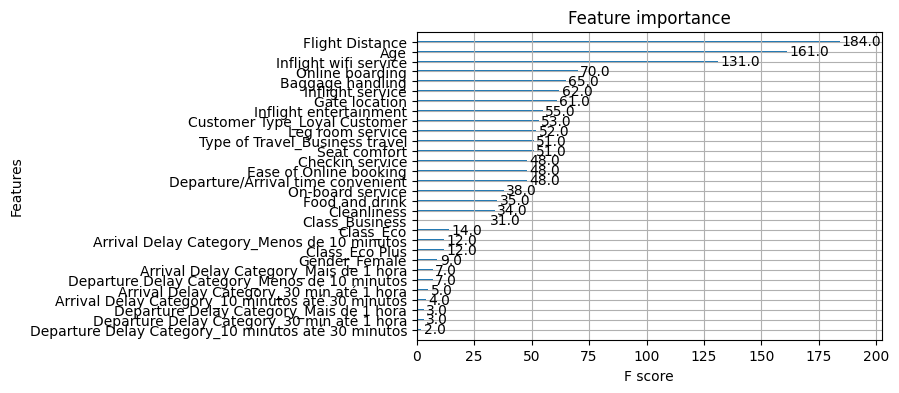

In [184]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

In [185]:
history

XGBClassifier(alpha=10, base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import xgboost as xgb


In [187]:
#Funções Auxilires
def extract_final_losses(model):
    history = model.evals_result()
    train_loss = history['validation_0']['logloss']
    val_loss = history['validation_1']['logloss']
    idx_min_val_loss = np.argmin(val_loss)
    return {'train_loss': train_loss[idx_min_val_loss], 'val_loss': val_loss[idx_min_val_loss]}

def plot_training_error_curves(model):
    # Retrieve the evaluation results
    results = model.evals_result()
    
    # Plot the error curves
    epochs = len(results['validation_0'][params['eval_metric']])
    x_axis = range(0, epochs)
    
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0'][params['eval_metric']], label='Train')
    ax.plot(x_axis, results['validation_1'][params['eval_metric']], label='Validation')
    
    ax.legend()
    plt.xlabel('Iterations')
    plt.ylabel(params['eval_metric'])
    plt.title('XGBoost Error Curve')
    plt.show()

def compute_performance_metrics(model, X_test, y_test):
    """
    Compute and plot performance metrics for an XGBoost model.

    Parameters:
    - model: trained XGBoost model object
    - X_test: feature matrix for testing
    - y_test: true labels for testing
    
    Returns:
    - None (plots the metrics)
    """

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Compute AUROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Compute AUPR
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    aupr = auc(recall, precision)

    # Precision and recall at default threshold (0.5)
    default_threshold_idx = np.argmin(np.abs(_ - 0.5))
    default_precision = precision[default_threshold_idx]
    default_recall = recall[default_threshold_idx]

    y_pred_scores = model.predict_proba(X_test)
    skplt.metrics.plot_ks_statistic(y_test, y_pred_scores)
    plt.show()

    return (accuracy, default_recall, default_precision, f1, roc_auc, aupr)


def print_metrics_summary(accuracy, recall, precision, f1, auroc=None, aupr=None):
    print()
    print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy))
    print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall))
    print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision))
    print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1))
    if auroc is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=auroc))
    if aupr is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUPR:", value=aupr))

In [188]:
y_pred_scores = history.predict_proba(X_test)[:, 1]
print(y_pred_scores)

[1.9149889e-05 5.5315513e-06 9.9999738e-01 ... 7.9915890e-06 2.0504988e-06
 4.2951538e-05]


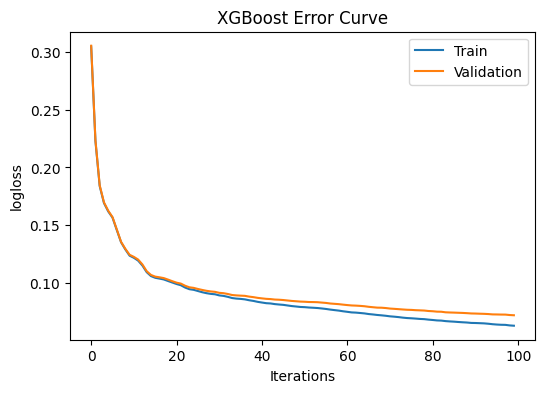

In [189]:
plot_training_error_curves(history)

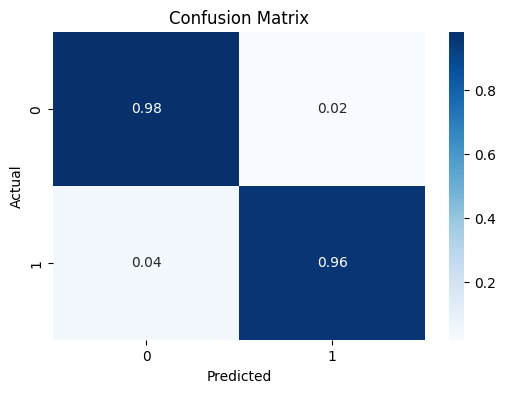

In [190]:
# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

# Create heatmap
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")

# Set labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show plot
plt.show()

In [191]:
y_pred_class = xgb_clf.predict(X_test)
y_pred_scores = xgb_clf.predict_proba(X_test)
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)


Train Loss:       0.0627
Validation Loss:  0.0718

Performance no conjunto de teste:


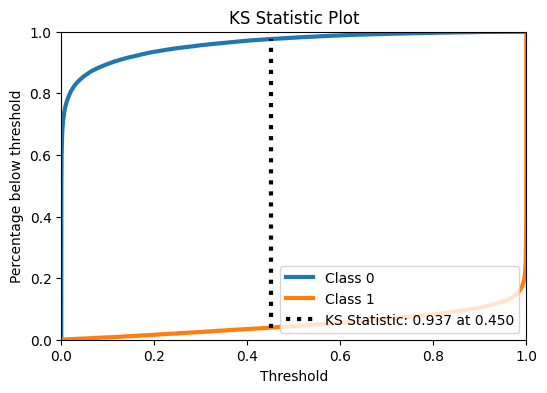


Accuracy:         0.9697
Recall:           0.9554
Precision:        0.9743
F1:               0.9647
AUROC:            0.9965
AUPR:             0.9959


In [192]:
## Resumo dos resultados
losses = extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(history, X_test, y_test)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

## Otimização de hyperparametros com hyperopt

In [193]:
!pip install hyperopt


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [194]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.base import scope
from hyperopt import space_eval
import hyperopt.pyll.stochastic

In [195]:
# Função objetivo para o Hyperopt
def objective(params):
    model = create_xgb_model(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

In [196]:
objective(params)

{'loss': -0.9582306744687403, 'status': 'ok'}

In [197]:
space = {
    'eval_metric': hp.choice('eval_metric', ['error', 'logloss', 'auc']),
    'max_depth': hp.choice('max_depth', range(3, 15)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),
    'alpha': hp.uniform('alpha', 0.0, 1.0),
    'n_estimators': hp.choice('n_estimators', range(100, 1000)),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'booster': hp.choice('booster', ['gbtree', 'gblinear', 'dart'])
}

In [198]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

  4%|▍         | 2/50 [29:22<13:22:12, 1002.76s/trial, best loss: -0.964736680012319]

c:\Users\Filipe Gomes de Melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:23:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



  6%|▌         | 3/50 [29:24<7:07:35, 545.86s/trial, best loss: -0.964736680012319]  

c:\Users\Filipe Gomes de Melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:23:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



 10%|█         | 5/50 [1:15:24<15:04:56, 1206.59s/trial, best loss: -0.964736680012319]

c:\Users\Filipe Gomes de Melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:09:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



 14%|█▍        | 7/50 [1:21:31<7:50:01, 655.86s/trial, best loss: -0.964736680012319]  

c:\Users\Filipe Gomes de Melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:15:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



 18%|█▊        | 9/50 [1:30:20<5:22:40, 472.22s/trial, best loss: -0.964736680012319]

c:\Users\Filipe Gomes de Melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:24:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



 20%|██        | 10/50 [1:30:21<3:37:58, 326.96s/trial, best loss: -0.964736680012319]

c:\Users\Filipe Gomes de Melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:24:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



 22%|██▏       | 11/50 [1:30:23<2:27:51, 227.47s/trial, best loss: -0.964736680012319]

c:\Users\Filipe Gomes de Melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:24:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



 30%|███       | 15/50 [2:09:37<6:38:26, 683.05s/trial, best loss: -0.964736680012319]

c:\Users\Filipe Gomes de Melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:03:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



 36%|███▌      | 18/50 [2:37:59<6:37:13, 744.81s/trial, best loss: -0.964736680012319]

c:\Users\Filipe Gomes de Melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:31:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



 38%|███▊      | 19/50 [2:38:01<4:29:29, 521.61s/trial, best loss: -0.964736680012319]

c:\Users\Filipe Gomes de Melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:31:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



 86%|████████▌ | 43/50 [6:26:43<24:08, 206.87s/trial, best loss: -0.964736680012319]   

c:\Users\Filipe Gomes de Melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:20:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



 90%|█████████ | 45/50 [7:03:16<1:03:15, 759.20s/trial, best loss: -0.964736680012319]

c:\Users\Filipe Gomes de Melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:57:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



 96%|█████████▌| 48/50 [7:33:43<26:56, 808.02s/trial, best loss: -0.964736680012319]  

c:\Users\Filipe Gomes de Melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:27:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 50/50 [7:33:46<00:00, 544.53s/trial, best loss: -0.964736680012319]


In [199]:
best_params = space_eval(space, best)
final_model = xgb.XGBClassifier(**best_params, n_jobs=-1, random_state=42)
final_model.fit(X_train, y_train)

XGBClassifier(alpha=0.43030369185329154, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7229139255628805, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08195677717847881,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=232, n_jobs=-1,
              num_parallel_tree=None, ...)

In [200]:
y_pred_final = final_model.predict(X_val)
accuracy_final = accuracy_score(y_val, y_pred_final)
print(f'Final Accuracy: {accuracy_final}')

Final Accuracy: 0.9646596858638743
